In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset we need

In [3]:
data=pd.read_csv("Real estate.csv")
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


# Checking dataset for the NaN values and other EDAs

In [4]:
data.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Plotting the realtions

<AxesSubplot:xlabel='X1 transaction date', ylabel='Y house price of unit area'>

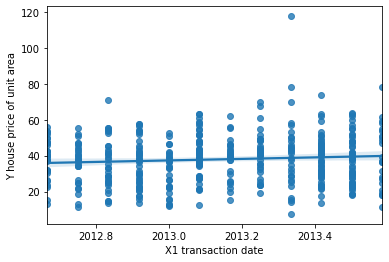

In [6]:
sns.regplot(x = "X1 transaction date" ,y = "Y house price of unit area",data = data)

<AxesSubplot:xlabel='X2 house age', ylabel='Y house price of unit area'>

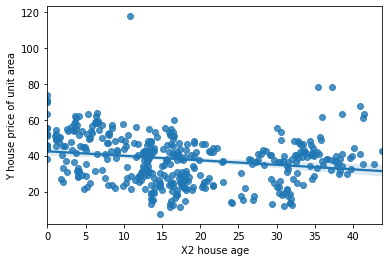

In [7]:
sns.regplot(x = "X2 house age" ,y = "Y house price of unit area",data = data)

<AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

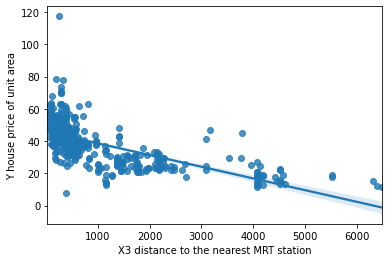

In [8]:
sns.regplot(x = "X3 distance to the nearest MRT station" ,y = "Y house price of unit area",data = data)

Text(0.5, 6.79999999999999, 'house price of unit area')

<Figure size 576x216 with 0 Axes>

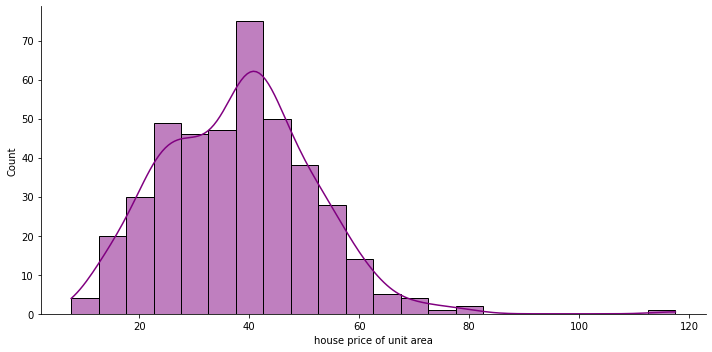

In [9]:
plt.figure(figsize=(8,3))
sns.displot(x=data['Y house price of unit area'], kde=True, aspect=2, color='purple')
plt.xlabel('house price of unit area')

In [10]:
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [11]:
x = data.iloc[:,:-1]
y = data.iloc[:,[-1]]

# Before fitting the data to the model let's normalise tha data

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

# Spliting of the dataset

In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3)

# After looking at the result we come to know that it is a regression problem

In [16]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha = 30)

In [17]:
reg.fit(x_train,y_train)

Ridge(alpha=30)

In [18]:
pred = reg.predict(x_test)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE= mean_absolute_error(y_test, pred)
MSE= mean_squared_error(y_test, pred)
RMSE= np.sqrt(MSE)

In [20]:
d = {"Mean_Absolute_Error" : MAE,"Mean_Square_Error": MSE,"Root_Mean_Square_Error":RMSE}

In [21]:
d

{'Mean_Absolute_Error': 0.4762168883055103,
 'Mean_Square_Error': 0.4050122190995163,
 'Root_Mean_Square_Error': 0.636405703226736}